In [1]:
import os
import networkx as nx
import pydotplus
import matplotlib.pyplot as plt
import itertools
from yosys_networkx import *

In [2]:
G = verilog2networkx('counter.v', pngfile='counter.png')

![counter](counter.png)

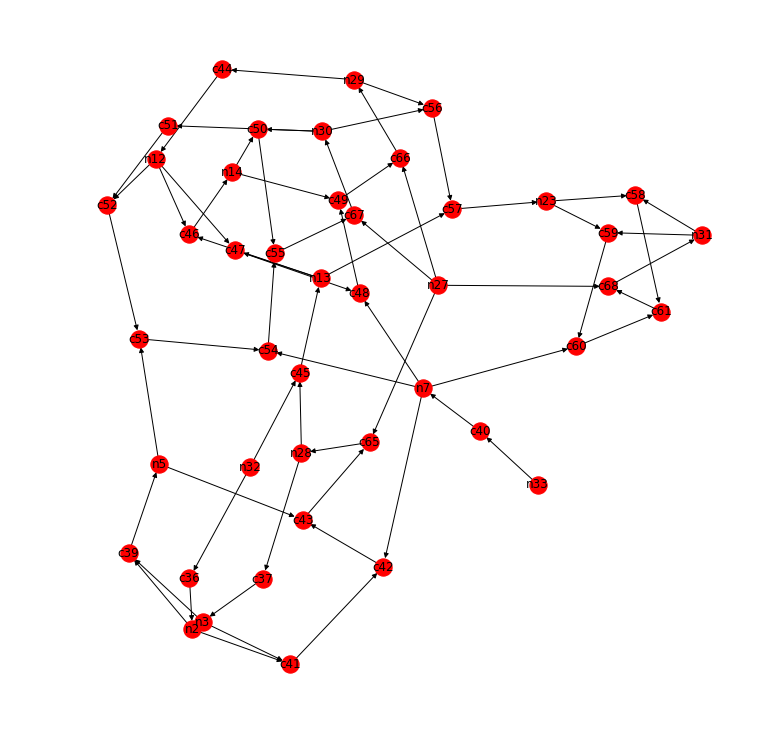

In [3]:
plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(G, with_labels=True)

In [4]:
internal_nets(G)

['n2', 'n23', 'n13', 'n14', 'n7', 'n5', 'n12', 'n3']

In [5]:
G = remove_internal_nets(G)

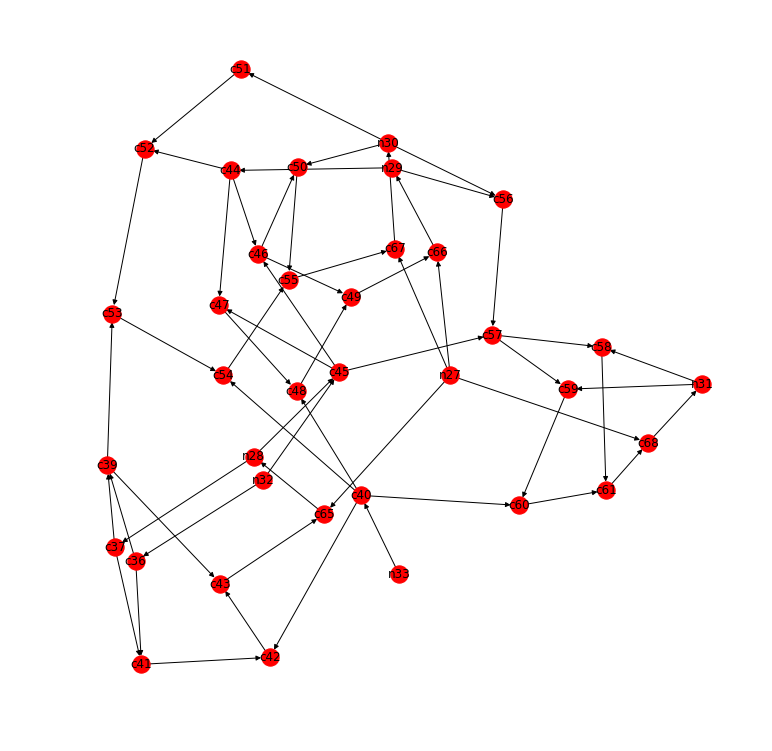

In [6]:
plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(G, with_labels=True)

In [7]:
# simple cycles in the directed graph show cyclical paths
c1 = list(nx.simple_cycles(G))
(c1, len(c1))

([['c65', 'n28', 'c37', 'c39', 'c43'],
  ['c65', 'n28', 'c37', 'c41', 'c42', 'c43'],
  ['c48', 'c49', 'c66', 'n29', 'c44', 'c47'],
  ['n29', 'c44', 'c46', 'c49', 'c66'],
  ['c53', 'c54', 'c55', 'c67', 'n30', 'c51', 'c52'],
  ['n30', 'c50', 'c55', 'c67'],
  ['c59', 'c60', 'c61', 'c68', 'n31'],
  ['c68', 'n31', 'c58', 'c61']],
 8)

In [8]:
G2 = nx.Graph(G.to_undirected())

/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


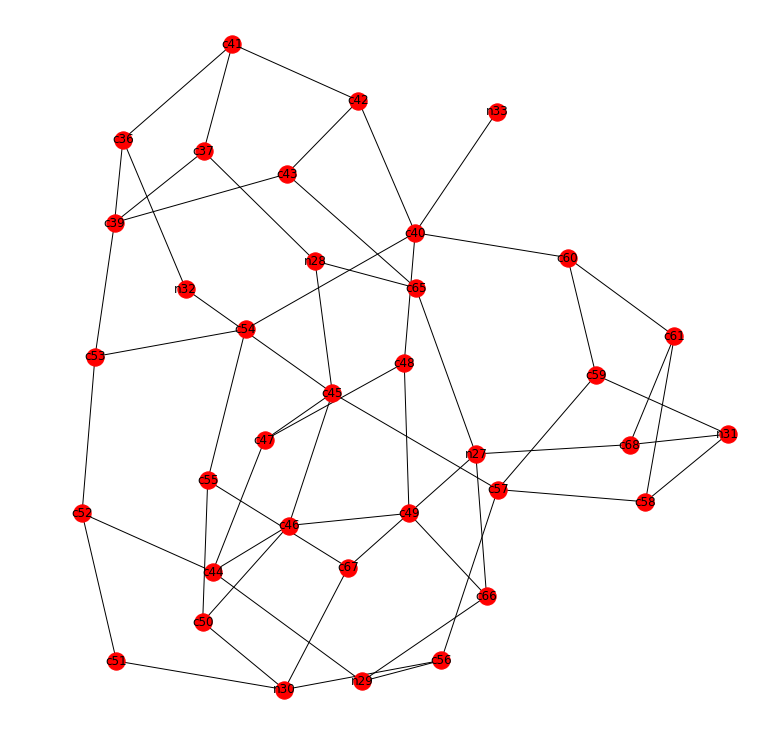

In [9]:
plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(G2, with_labels=True)

In [10]:
# cycle basis in undirected graph shows both cyclical and reconvergent paths
c2 = nx.cycle_basis(G2)
(c2, len(c2))

([['c68', 'n31', 'c58', 'c61'],
  ['c59', 'n31', 'c58', 'c61', 'c60'],
  ['c59', 'c57', 'c58', 'c61', 'c60'],
  ['n30', 'c56', 'c57', 'c58', 'c61', 'c60', 'c40', 'c54', 'c55', 'c67'],
  ['n27',
   'c66',
   'n29',
   'c56',
   'c57',
   'c58',
   'c61',
   'c60',
   'c40',
   'c54',
   'c55',
   'c67'],
  ['c48', 'c49', 'c66', 'n29', 'c56', 'c57', 'c58', 'c61', 'c60', 'c40'],
  ['c45', 'c46', 'c49', 'c66', 'n29', 'c56', 'c57'],
  ['c50',
   'c46',
   'c49',
   'c66',
   'n29',
   'c56',
   'c57',
   'c58',
   'c61',
   'c60',
   'c40',
   'c54',
   'c55'],
  ['c44', 'c46', 'c49', 'c66', 'n29'],
  ['c48', 'c47', 'c44', 'n29', 'c56', 'c57', 'c58', 'c61', 'c60', 'c40'],
  ['c45', 'c47', 'c44', 'n29', 'c56', 'c57'],
  ['c53',
   'c52',
   'c44',
   'n29',
   'c56',
   'c57',
   'c58',
   'c61',
   'c60',
   'c40',
   'c54'],
  ['n30', 'c51', 'c52', 'c44', 'n29', 'c56'],
  ['c53',
   'c39',
   'c36',
   'n32',
   'c45',
   'c57',
   'c58',
   'c61',
   'c60',
   'c40',
   'c54'],
  ['n28', 

In [11]:
G2.number_of_nodes(), G2.number_of_edges()

(36, 57)

In [12]:
# edge list for exporting to SAT solver
list(G2.edges())

[('c45', 'c57'),
 ('c45', 'c47'),
 ('c45', 'n28'),
 ('c45', 'n32'),
 ('c45', 'c46'),
 ('c67', 'n30'),
 ('c67', 'n27'),
 ('c67', 'c55'),
 ('c60', 'c59'),
 ('c60', 'c40'),
 ('c60', 'c61'),
 ('c55', 'c50'),
 ('c55', 'c54'),
 ('c65', 'c43'),
 ('c65', 'n28'),
 ('c65', 'n27'),
 ('n28', 'c37'),
 ('c37', 'c41'),
 ('c37', 'c39'),
 ('n32', 'c36'),
 ('c39', 'c53'),
 ('c39', 'c43'),
 ('c39', 'c36'),
 ('c58', 'c57'),
 ('c58', 'n31'),
 ('c58', 'c61'),
 ('c57', 'c56'),
 ('c57', 'c59'),
 ('n31', 'c68'),
 ('n31', 'c59'),
 ('c51', 'n30'),
 ('c51', 'c52'),
 ('c43', 'c42'),
 ('c53', 'c52'),
 ('c53', 'c54'),
 ('c66', 'n29'),
 ('c66', 'n27'),
 ('c66', 'c49'),
 ('c50', 'n30'),
 ('c50', 'c46'),
 ('c49', 'c48'),
 ('c49', 'c46'),
 ('c40', 'c48'),
 ('c40', 'c42'),
 ('c40', 'n33'),
 ('c40', 'c54'),
 ('c41', 'c42'),
 ('c41', 'c36'),
 ('n29', 'c44'),
 ('n29', 'c56'),
 ('c46', 'c44'),
 ('c68', 'n27'),
 ('c68', 'c61'),
 ('n30', 'c56'),
 ('c52', 'c44'),
 ('c48', 'c47'),
 ('c47', 'c44')]